## Building a fully connected sequential model for automobile price prediction

In [1]:
import pandas as pd

In [2]:
automobile_data = pd.read_csv("datasets/imports-85.csv", header=None, names=["symboling","normalized-losses","make","fuel-type",
        "aspiration", "num-of-doors","body-style", "drive-wheels","engine-location","wheel-base", "length","width",
        "height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke",
        "compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"],na_values='?')
#Replaced ? with NaN
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
#drop NAN values
automobile_data = automobile_data.dropna()

In [4]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [5]:
automobile_features = automobile_data[['make', 'fuel-type', 'body-style', 'horsepower']]

In [6]:
automobile_target = automobile_data[['price']]

In [7]:
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [8]:
automobile_target['price'].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

Our input x features contains values for other columns such as make, fuel-type and body-style. All three of these columns contain values that are categorical in nature. They belong to discrete categories.

The inputs that we pass into neural networks and the outputs from neural networks can only be numeric. That means we need to convert these categorical values into numeric form. For this we will use one-hot encoding.

In [9]:
automobile_features = pd.get_dummies(automobile_features,
                                    columns=['make', 'fuel-type', 'body-style']) #peforms one-hot encoding

In [10]:
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
automobile_features.columns #number of columns has expanded

Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [12]:
from sklearn import preprocessing

In [13]:
# Standardise numeric values for a more stable ML model and better performance

automobile_features[['horsepower']] = preprocessing.scale(automobile_features[['horsepower']])

#Subtracting the mean; Dividing by standard deviation

In [14]:
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(automobile_features,
                                                   automobile_target,
                                                   test_size=0.2,
                                                   random_state=0)

In [17]:
import torch

In [18]:
dtype = torch.float

In [19]:
x_train_tensor = torch.tensor(x_train.values, dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype = dtype)

y_train_tensor = torch.tensor(y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [20]:
x_train_tensor.shape

torch.Size([127, 26])

In [21]:
y_train_tensor.shape

torch.Size([127, 1])

In [22]:
inp = 26
out = 1

hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

In [23]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid), # Sequential model holding NN layers in a sequence
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid, out))

In [24]:
for epoch in range(10000):
    y_pred = model(x_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if epoch % 1000 == 0:
        print(epoch, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param-= learning_rate * param.grad

0 168088672.0
1000 4279930.5
2000 2354738.0
3000 1685026.75
4000 1393326.0
5000 1301251.875
6000 1234706.375
7000 1181808.0
8000 1134140.375
9000 1085046.75


In [25]:
sample = x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [26]:
sample_tensor = torch.tensor(sample.values, dtype = dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [27]:
y_pred = model(sample_tensor)
print('Predicted price: ', int(y_pred.item()))
print('Actual price: ', int(y_test.iloc[23]))

8097
8495


In [28]:
#Running predictions on entire test dataset
y_pred_tensor = model(x_test_tensor)

In [29]:
#Detaching the tensor and converting to numpy array
y_pred = y_pred_tensor.detach().numpy()

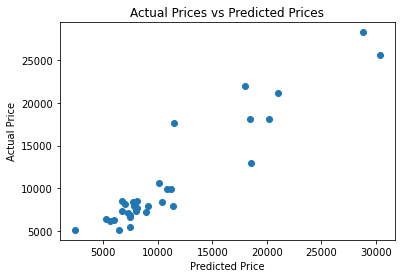

In [30]:
#Visualisation of actual vs predicted prices
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

#### Serialise the model

In [33]:
torch.save(model, 'my_model')

In [34]:
saved_model = torch.load('my_model') #Loading the saved model using torch.load()

In [35]:
#Performing prediction using the re-loaded model
y_pred_tensor = saved_model(x_test_tensor)

In [36]:
y_pred = y_pred_tensor.detach().numpy()

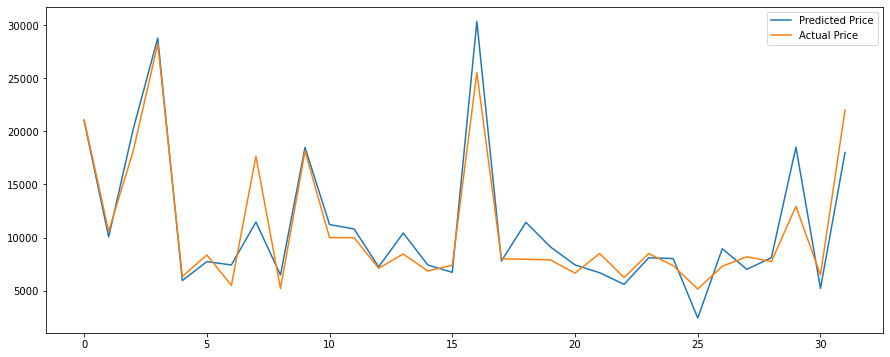

In [37]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label='Predicted Price')
plt.plot(y_test.values, label='Actual Price')

plt.legend()
plt.show()